# Heart Failure

In [216]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout , Flatten
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [217]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [218]:
df.shape

(299, 13)

In [219]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [220]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [222]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


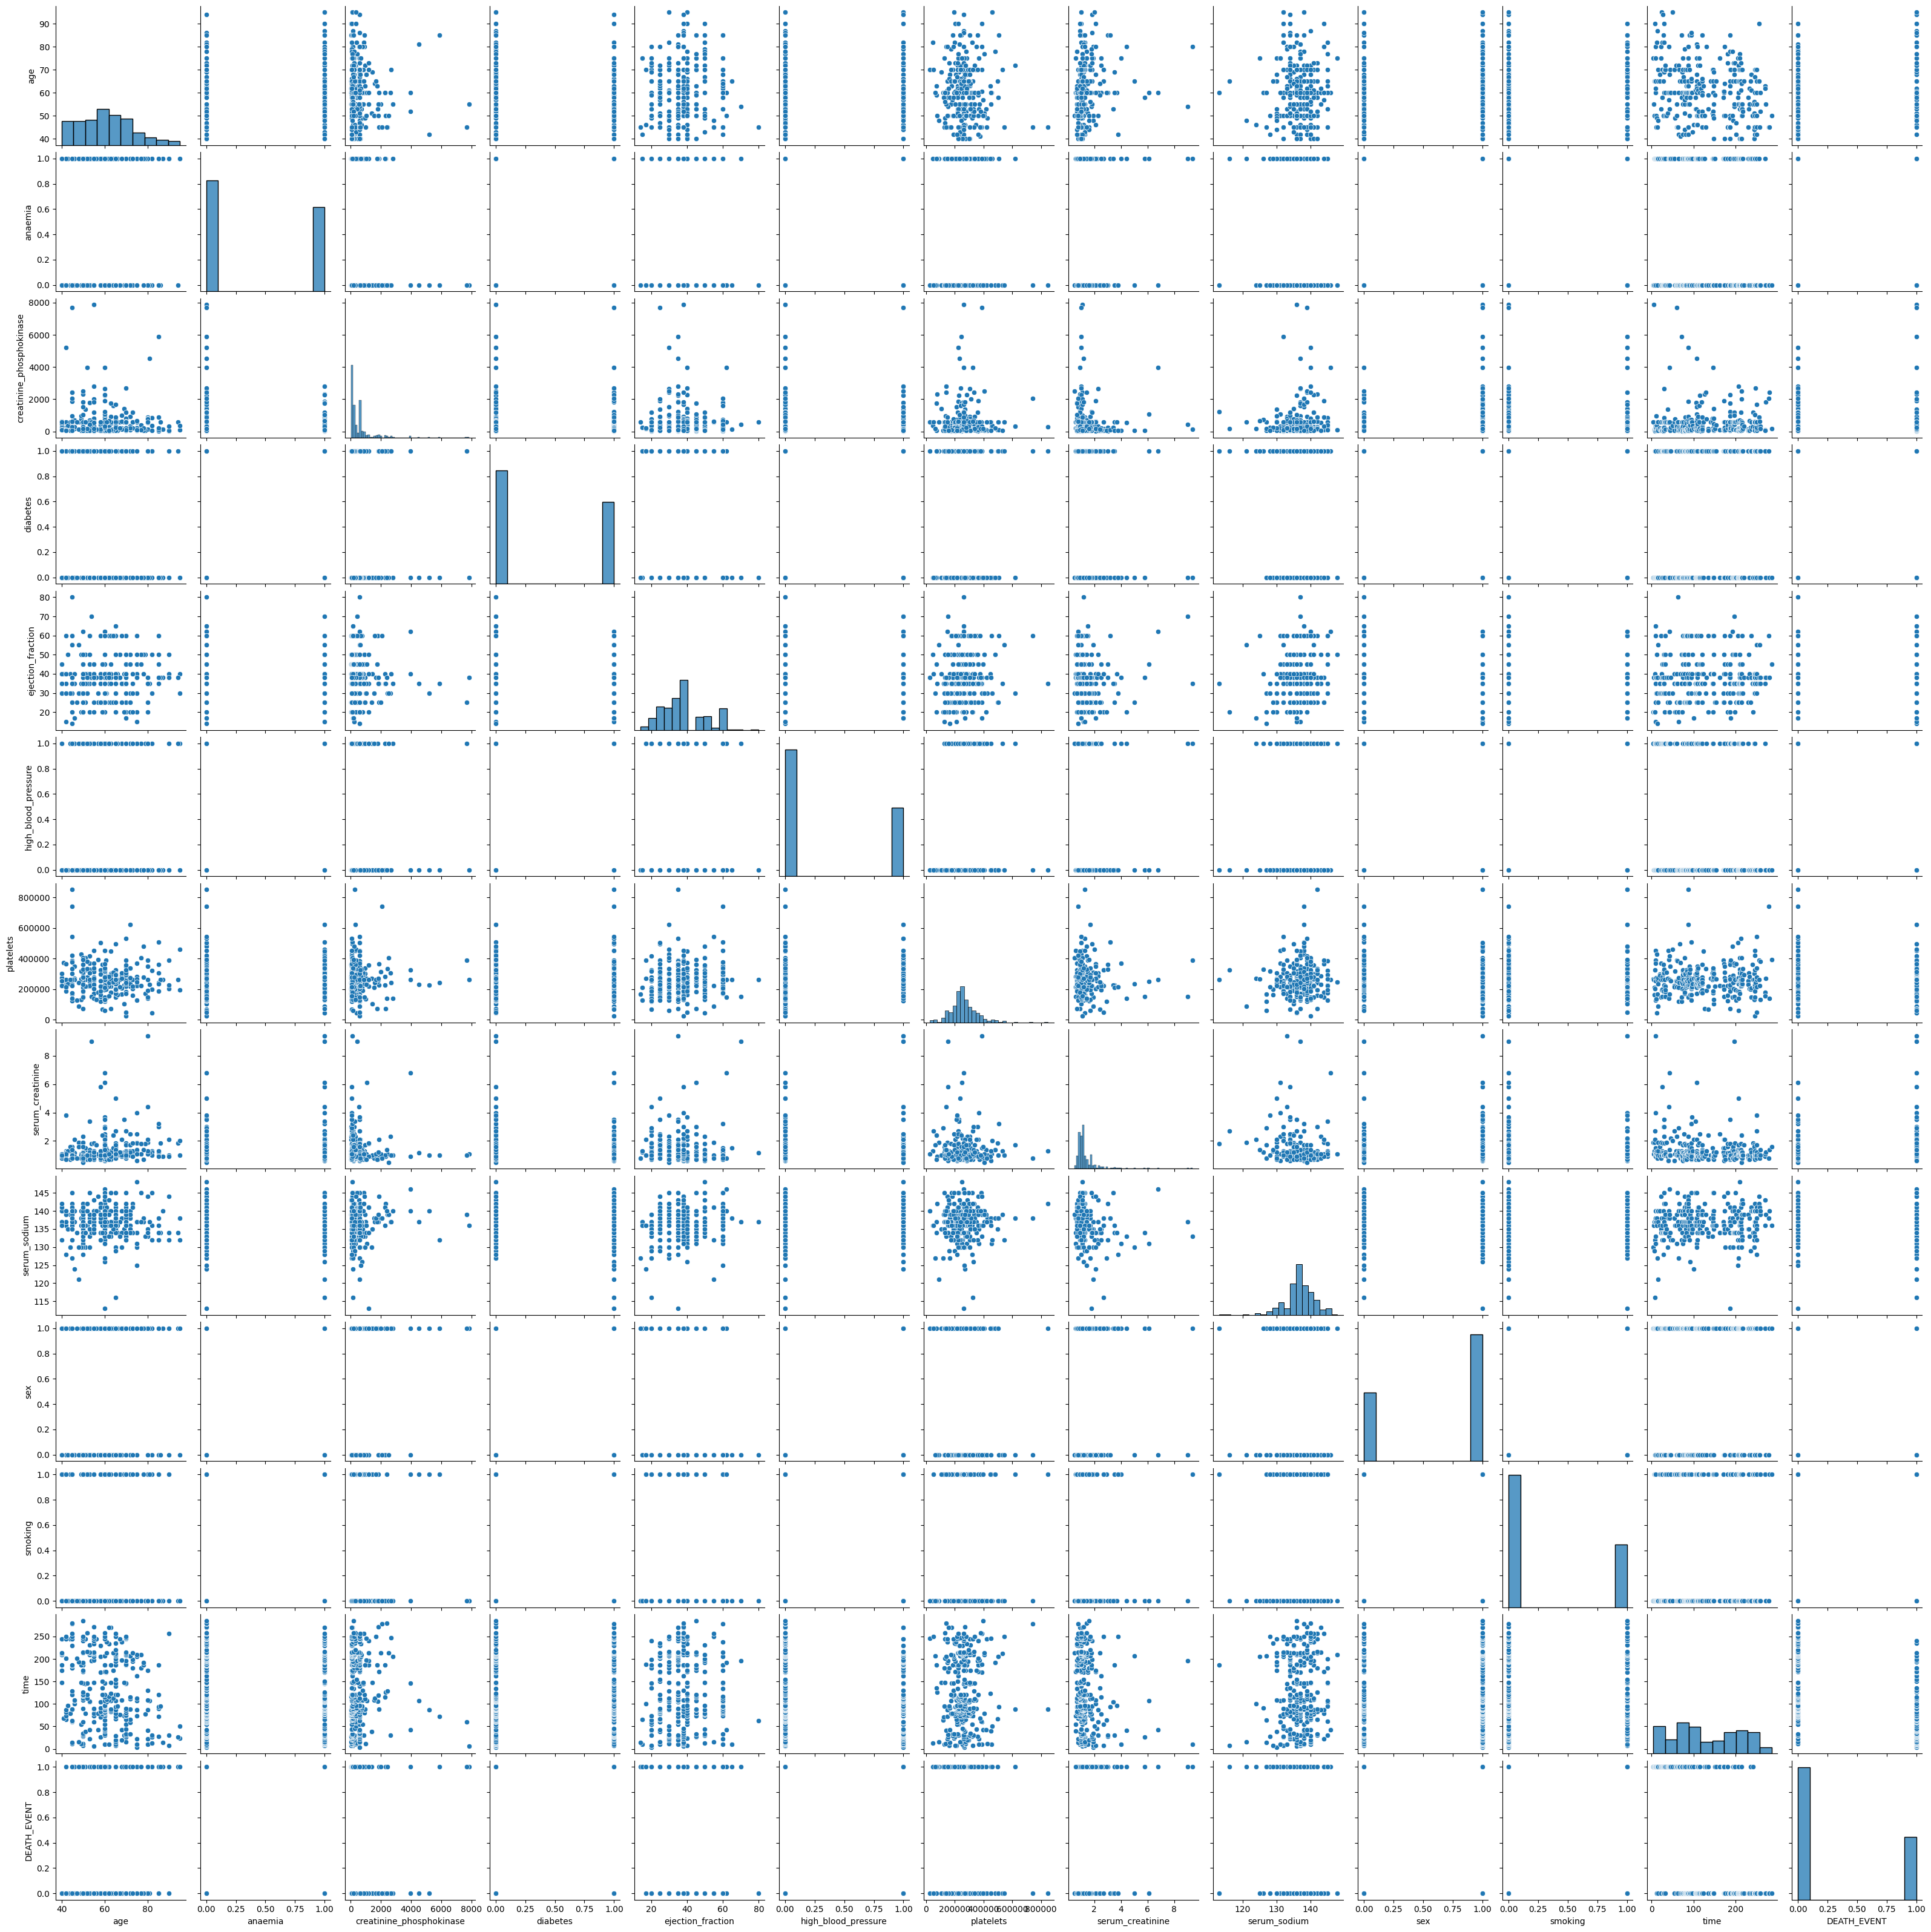

In [223]:
sns.pairplot(df)

In [224]:
df["DEATH_EVENT"].nunique()

2

# ÖNCE SINIFLANDIRMA YÖNTEMLERİNİ SONRA DA DERİN ÖĞRENME (ANN) YI DENEYELİM

## KNN

In [225]:
x= df.drop("DEATH_EVENT" , axis=1)
y = df["DEATH_EVENT"]

In [226]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [228]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [229]:
print(y_train.dtype, y_test.dtype)
print(set(y_train))  # Verinin içinde hangi sınıfların olduğunu gösterir.


int64 int64
{0, 1}


In [230]:
y_train = y_train.round().astype(int)
y_test = y_test.round().astype(int)


In [231]:
hata_oranı = []

for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaler_X_train,y_train)
    knn_pred = knn.predict(scaler_X_test)

    err = (1-accuracy_score(y_test,knn_pred))
    hata_oranı.append(err)

Text(0.5, 0, 'K Değeri')

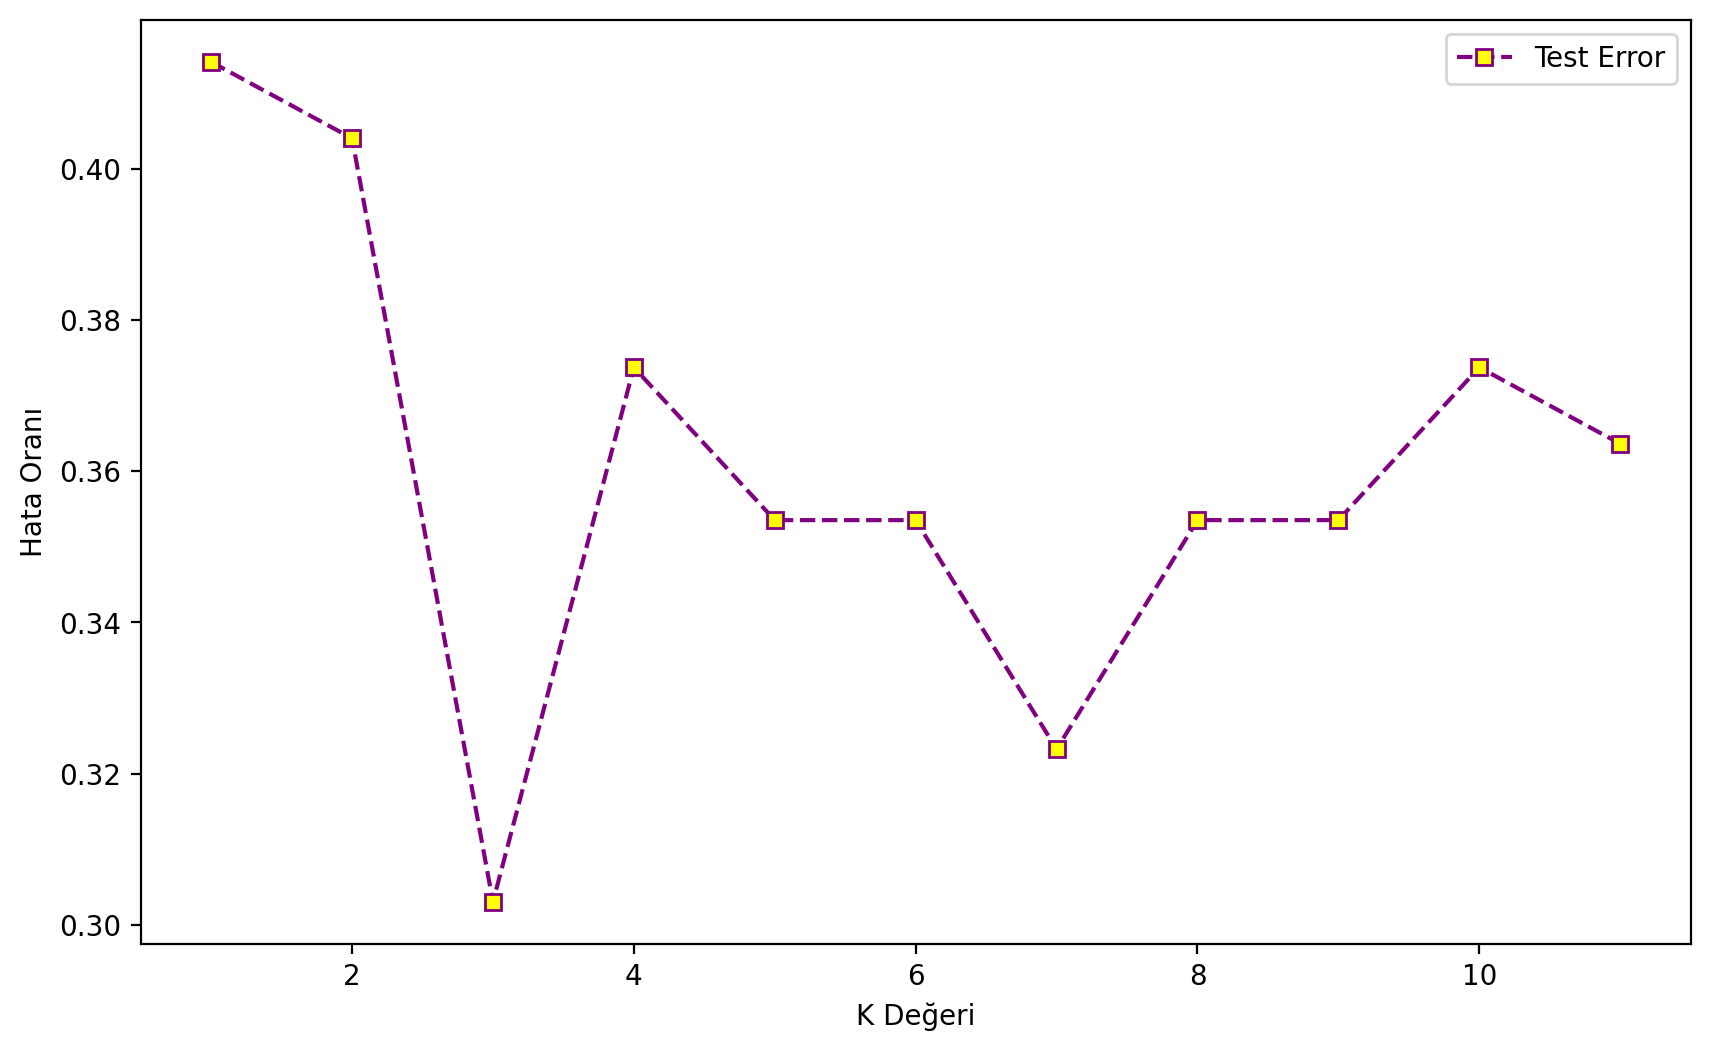

In [232]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,12),hata_oranı,color="purple", linestyle="dashed" ,
 marker="s" , markerfacecolor="yellow",label='Test Error')
plt.legend()
plt.ylabel('Hata Oranı')
plt.xlabel("K Değeri")

In [233]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaler_X_train,y_train)
knn_pred= knn.predict(scaler_X_test)

In [234]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.67      0.95      0.78        57
           1       0.83      0.36      0.50        42

    accuracy                           0.70        99
   macro avg       0.75      0.65      0.64        99
weighted avg       0.74      0.70      0.66        99



## Random Forest

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [236]:
random = RandomForestClassifier()
random.fit(X_train,y_train)
random_Pred = random.predict(X_test)

In [237]:
print(classification_report(y_test,random_Pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        57
           1       0.79      0.55      0.65        42

    accuracy                           0.75        99
   macro avg       0.76      0.72      0.73        99
weighted avg       0.76      0.75      0.74        99



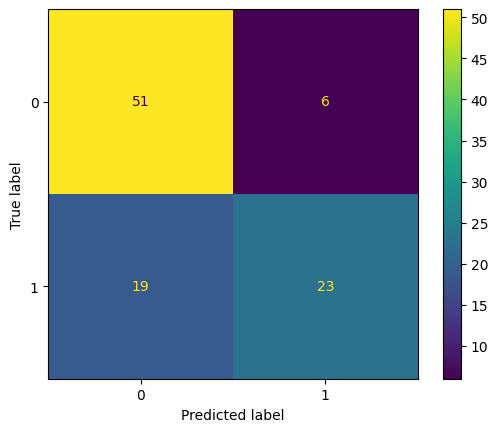

In [238]:
ConfusionMatrixDisplay.from_estimator(random , X_test,y_test)

* Grid search uygulayarak daha iyisini bulabilirsiniz. Ama asıl amaç derin öğrenme tarafını detaylı incelemek.O yüzden derin öğrenme tarafına biraz daha yoğunluk göstererek kodlamaya çalışalım

# ANN

In [239]:
x = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

In [240]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

* (data augmentation) Yani flow işlemi yalnızca görüntü verilerinde olduğundan dolayı kullanamıyoruz.Bunu manuel işlem olarak gerçekleştirelim 

In [ ]:
import numpy as np

X_train_augmented = X_train + np.random.normal(0, 0.01, X_train.shape)  # Küçük rastgele gürültü ekleme

# Fit ederken kullanmamız gerekecek


In [242]:
scaler = MinMaxScaler()
ann_X_train = scaler.fit_transform(X_train)
ann_X_test = scaler.transform(X_test)

In [243]:
y_train.shape

(209,)

In [244]:
y_test.shape

(90,)

# 2 çıkış olduğundan 

In [245]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,2)
y_test = to_categorical(y_test,2)

In [261]:
y_train.shape

(209, 2)

In [262]:
y_test.shape

(90, 2)

# Kernel İnitializers deneyelim ;

In [263]:

from tensorflow.keras import initializers  # Kernel initializer'lar için
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(64,activation="relu",kernel_initializer=initializers.HeUniform()),
    BatchNormalization(), # Reludan sonra
    Dense(32,activation="relu",kernel_initializer=initializers.HeUniform()),
    BatchNormalization(), # Reludan sonra
    Dropout(0.2),
    Dense(8,activation="relu",kernel_initializer=initializers.HeUniform()),
    BatchNormalization(), # Reludan sonra
    Dense(2,activation="softmax",kernel_initializer=initializers.GlorotUniform()) # 
    ])

# ADAM DENEYELİM

* Adam (Adaptive Moment Estimation), derin öğrenme modelleri için yaygın olarak kullanılan bir optimizasyon algoritmasıdır. Adam, Momentum ve Adagrad algoritmalarının bir birleşimidir ve her parametre için farklı öğrenme hızları kullanarak daha hızlı ve etkili bir şekilde öğrenmeye çalışır.

---- Adam'ın temel avantajları:

* İlk ve İkinci Moment Tahminleri: Adam, hem ilk momenti (ortalama) hem de ikinci momenti (dağılım) hesaplayarak her parametre için uyarlanabilir öğrenme hızları belirler.

* Bu, öğrenme sürecini daha stabil hale getirebilir.

* Momentum: Momentum, önceki adımlardan öğrenilen bilgiyle hız kazanılmasını sağlar, bu da daha hızlı öğrenmeyi ve yerel minimumlardan kaçmayı sağlar.

* İleri ve Geri Yönlü Hızlı Düzeltmeler: Adam, her parametre için öğrenme hızını anlık olarak ayarlar. Bu, parametrelerin düzgün bir şekilde güncellenmesini sağlar.

In [272]:
from tensorflow.keras.optimizers import SGD # Deneyebilirsiniz.

model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])


In [273]:
fit = model.fit(ann_X_train, y_train, epochs=64, batch_size=64, validation_data=(ann_X_test, y_test))

Epoch 1/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5209 - loss: 0.7728 - val_accuracy: 0.5889 - val_loss: 0.7115
Epoch 2/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4853 - loss: 0.7896 - val_accuracy: 0.5889 - val_loss: 0.7103
Epoch 3/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5420 - loss: 0.7431 - val_accuracy: 0.5889 - val_loss: 0.7089
Epoch 4/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5545 - loss: 0.7549 - val_accuracy: 0.5889 - val_loss: 0.7078
Epoch 5/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5170 - loss: 0.7597 - val_accuracy: 0.5889 - val_loss: 0.7064
Epoch 6/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5310 - loss: 0.7383 - val_accuracy: 0.6000 - val_loss: 0.7053
Epoch 7/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5204 - loss: 0.7711 - val_accuracy: 0.5889 - val_loss: 0.7039
Epoch 8/64
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5324 - loss: 0.7367 - val_accuracy: 0.6000 - val_loss: 0.7023


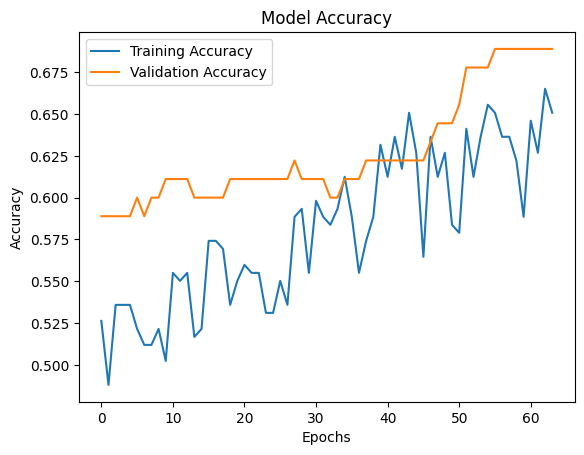

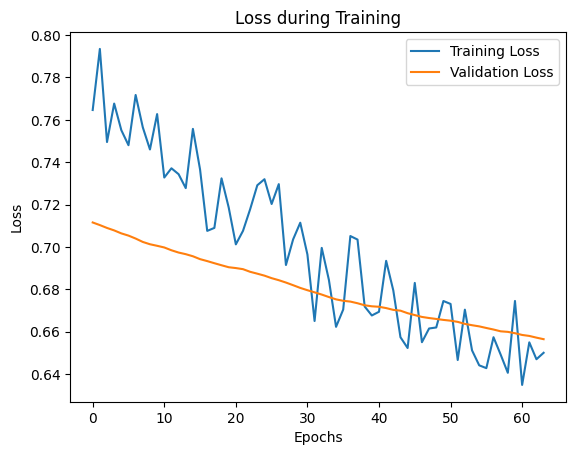

In [274]:
# Doğruluk grafiği
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')  # Corrected this line
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')  # Corrected this line
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [300]:
# Tahminler (olasılıklar)
pred = model.predict(ann_X_test)

'''
Bu satır, eğitim sırasında öğrenilen modelin ann_X_test (test verisi) üzerindeki tahminlerini yapıyor.
model.predict() fonksiyonu, her test örneği için iki sınıfın olasılıklarını döndürüyor (örneğin, DEATH_EVENT = 0 ya da 1).
'''

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


'\n\nBu satır, eğitim sırasında öğrenilen modelin ann_X_test (test verisi) üzerindeki tahminlerini yapıyor.\nmodel.predict() fonksiyonu, her test örneği için iki sınıfın olasılıklarını döndürüyor (örneğin, DEATH_EVENT = 0 ya da 1).\n'

In [301]:
print(X_test.shape)  # Test veri setinin boyutu
print(y_test.shape)  # Etiketlerin boyutu

'''''
Bu satırda, test verisi ve etiketlerinin boyutları yazdırılır. 
X_test.shape test verisinin (örneğin, 90 örnek, 12 özellik) boyutunu, y_test.shape ise test etiketlerinin (90 örnek, 2 sınıf) boyutunu gösterir.
'''

(90, 12)
(90, 2)


"''\nBu satırda, test verisi ve etiketlerinin boyutları yazdırılır. \nX_test.shape test verisinin (örneğin, 90 örnek, 12 özellik) boyutunu, y_test.shape ise test etiketlerinin (90 örnek, 2 sınıf) boyutunu gösterir.\n"

In [ ]:
pred_class = (pred[:, 1] > 0.5).astype(int)

'''
Modelin tahmin ettiği olasılıklardan yalnızca ikinci sınıfın (yani DEATH_EVENT = 1 olasılığı) 0.5'ten büyük olup olmadığına bakılır. 
Eğer olasılık 0.5'ten büyükse, sınıf 1 olarak etiketlenir. Aksi takdirde, sınıf 0 olarak etiketlenir. 
Bu, ikili sınıflama problemi için yaygın bir uygulamadır. Sonuç olarak, tahminler ikili sınıflara (0 veya 1) dönüştürülür.
'''

In [ ]:
# Gerçek etiketleri ve tahminleri kategorik sınıf etiketlerine dönüştürme
y_test_class = y_test.argmax(axis=1)  # Gerçek etiketlerin sınıfını alıyoruz (argmax ile)
pred_class = pred.argmax(axis=1)      # Tahminlerin sınıfını alıyoruz (argmax ile)

'''
y_test'in her bir örneği, bir one-hot kodlaması olarak temsil ediliyordur (yani, [0, 1] gibi bir vektör). 
Bu satır, bu one-hot vektörlerinin sınıf etiketine dönüştürülmesini sağlar. 
argmax(axis=1) ile her bir etiketin en yüksek değeri olan index'i alırız, yani gerçek sınıf etiketini alırız.

**

pred değişkeni, modelin test verisine ilişkin olasılık tahminlerini içeriyor. argmax(axis=1) fonksiyonu, her örnek için en yüksek olasılığa sahip olan sınıfı alır.
Bu, her tahminin hangi sınıfa ait olduğunu belirler.

'''

In [279]:
# Classification report
print(classification_report(y_test_class, pred_class))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        53
           1       0.65      0.54      0.59        37

    accuracy                           0.69        90
   macro avg       0.68      0.67      0.67        90
weighted avg       0.68      0.69      0.68        90



In [287]:

from tensorflow.keras import initializers  # Kernel initializer'lar için
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(64,activation="relu",kernel_initializer=initializers.HeUniform()),
    BatchNormalization(), # Reludan sonra
    Dense(32,activation="relu",kernel_initializer=initializers.HeUniform()),
    BatchNormalization(), # Reludan sonra
    Dropout(0.2),
    Dense(8,activation="relu",kernel_initializer=initializers.HeUniform()),
    BatchNormalization(), # Reludan sonra
    Dense(2,activation="softmax",kernel_initializer=initializers.GlorotUniform()) # 
    ])

# RMSprop Deneyelim

* RMSprop (Root Mean Square Propagation), derin öğrenme ve makine öğrenmesi algoritmalarında yaygın olarak kullanılan bir başka optimizasyon algoritmasıdır. RMSprop, öğrenme hızını her parametre için dinamik olarak ayarlayarak daha hızlı ve verimli bir öğrenme süreci sağlar.

---- RMSprop'un Temel Özellikleri:

* Dinamik Öğrenme Hızı: RMSprop, her parametre için farklı öğrenme hızları kullanır ve bu hızları sürekli olarak ayarlar. Bu, modelin her parametreyi daha verimli bir şekilde öğrenmesini sağlar.

* İkinci Moment Kullanımı: RMSprop, parametrelerin öğrenme hızlarını ayarlamak için yalnızca ikinci moment tahminini (dağılım) kullanır. Bu sayede, çok büyük ve küçük gradyanları dengeleyebilir ve öğrenme sürecini daha stabil hale getirebilir.

* Ağırlıkların Güncellenmesi: Öğrenme hızı, gradyanların ortalama karesi üzerinden hesaplanır. Bu, RMSprop'un her parametreye özel öğrenme hızları kullanarak daha etkili güncellemeler yapmasını sağlar.

In [288]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])


In [289]:
fit = model.fit(ann_X_train, y_train, epochs=64, batch_size=128, validation_data=(ann_X_test, y_test))

Epoch 1/64
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.5877 - loss: 0.9096 - val_accuracy: 0.4111 - val_loss: 0.7428
Epoch 2/64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6439 - loss: 0.8477 - val_accuracy: 0.4111 - val_loss: 0.7319
Epoch 3/64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6601 - loss: 0.8120 - val_accuracy: 0.4333 - val_loss: 0.7279
Epoch 4/64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7070 - loss: 0.7253 - val_accuracy: 0.4444 - val_loss: 0.7233
Epoch 5/64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7123 - loss: 0.7428 - val_accuracy: 0.4778 - val_loss: 0.7193
Epoch 6/64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7001 - loss: 0.7292 - val_accuracy: 0.5556 - val_loss: 0.7182
Epoch 7/64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7218 - loss: 0.7300 - val_accuracy: 0.5667 - val_loss: 0.7199
Epoch 8/64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7664 - loss: 0.6640 - val_accuracy: 0.5667 - val_loss: 0.7185

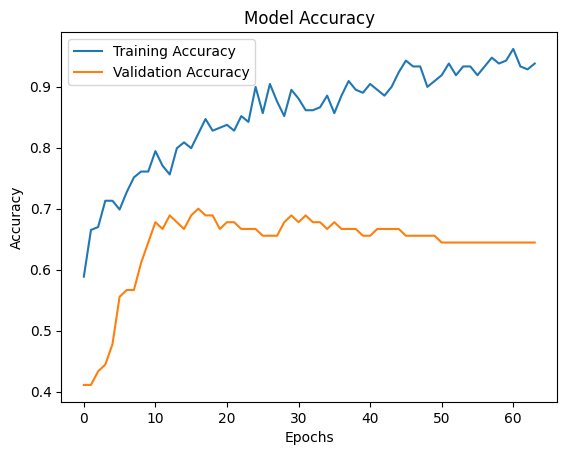

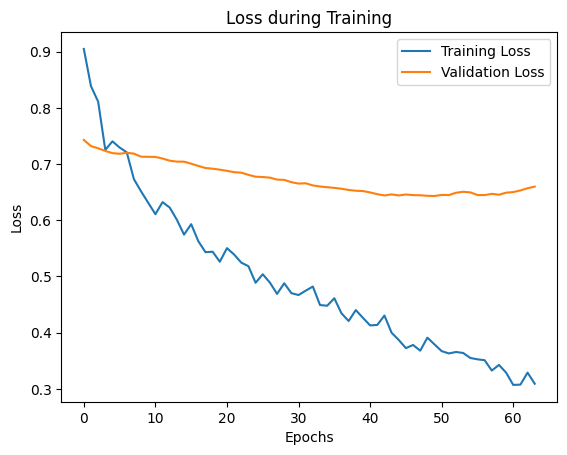

In [290]:
# Doğruluk grafiği
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')  # Corrected this line
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')  # Corrected this line
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [291]:
# Tahminler (olasılıklar)
pred = model.predict(ann_X_test)
print(X_test.shape)  # Test veri setinin boyutu
print(y_test.shape)  # Etiketlerin boyutu

pred_class = (pred[:, 1] > 0.5).astype(int)
# Gerçek etiketleri ve tahminleri kategorik sınıf etiketlerine dönüştürme
y_test_class = y_test.argmax(axis=1)  # Gerçek etiketlerin sınıfını alıyoruz (argmax ile)
pred_class = pred.argmax(axis=1)      # Tahminlerin sınıfını alıyoruz (argmax ile)
# Classification report
print(classification_report(y_test_class, pred_class))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
(90, 12)
(90, 2)
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        53
           1       1.00      0.14      0.24        37

    accuracy                           0.64        90
   macro avg       0.81      0.57      0.50        90
weighted avg       0.78      0.64      0.55        90



# LearningRateScheduler Deneyelim

* LearningRateScheduler, eğitim sırasında öğrenme hızını belirli bir kurala göre dinamik olarak değiştirmek için kullanılan bir tekniktir. Bu, modelin eğitim sürecinde daha stabil bir şekilde yakınsama yapmasına yardımcı olabilir.

---- LearningRateScheduler'ın Temel Özellikleri:

* Dinamik Öğrenme Hızı: Eğitim sırasında öğrenme hızını değiştirerek, modelin daha iyi bir şekilde öğrenmesini sağlar. Başlangıçta yüksek öğrenme hızı ile hızlı bir şekilde yakınsama yapılabilir, ancak modelin daha hassas öğrenmeye başlaması için öğrenme hızı azaltılabilir.

* Öğrenme Hızını Azaltma: Genellikle, model eğitimde ilerledikçe, öğrenme hızı yavaşlatılır. Bu, "early stopping" ve "model overfitting" gibi sorunları engellemeye yardımcı olabilir.

* LearningRateScheduler Kullanımı: LearningRateScheduler, eğitim sırasında öğrenme hızını belirli bir fonksiyona göre ayarlamayı sağlar. Bu fonksiyon her epoch'ta çağrılır ve her adımda öğrenme hızını değiştirmek için kullanılır.

Bu tür bir dinamik öğrenme hızı stratejisi, özellikle modelin daha hassas sonuçlar üretmesi ve daha uzun süre öğrenmesi gerektiğinde faydalıdır.

In [302]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Öğrenme oranı zamanlaması fonksiyonu
def scheduler(epoch, lr):
    # Her 10 epoch'ta bir öğrenme hızını %10 oranında azaltıyoruz
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.1
    return lr

# LearningRateScheduler callback'ini oluşturuyoruz
lr_scheduler = LearningRateScheduler(scheduler)

# Modeli derliyoruz
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Fit ederken callback'i ekliyoruz
fit = model.fit(ann_X_train, y_train, epochs=32, batch_size=64, validation_data=(ann_X_test, y_test), callbacks=[lr_scheduler])


Epoch 1/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9296 - loss: 0.2627 - val_accuracy: 0.7333 - val_loss: 0.5940 - learning_rate: 0.0010
Epoch 2/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9566 - loss: 0.2486 - val_accuracy: 0.7333 - val_loss: 0.5958 - learning_rate: 0.0010
Epoch 3/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9453 - loss: 0.2699 - val_accuracy: 0.7333 - val_loss: 0.5987 - learning_rate: 0.0010
Epoch 4/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9573 - loss: 0.2483 - val_accuracy: 0.7222 - val_loss: 0.6026 - learning_rate: 0.0010
Epoch 5/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9771 - loss: 0.2198 - val_accuracy: 0.7333 - val_loss: 0.6048 - learning_rate: 0.0010
Epoch 6/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9447 - loss: 0.2160 - val_accuracy: 0.7222 - val_loss: 0.6100 - learning_rate: 0.0010
Epoch 7/32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9635 - loss: 0.2068 - val_accuracy: 0.7111 

In [303]:
# Tahminler (olasılıklar)
pred = model.predict(ann_X_test)
print(X_test.shape)  # Test veri setinin boyutu
print(y_test.shape)  # Etiketlerin boyutu

pred_class = (pred[:, 1] > 0.5).astype(int)
# Gerçek etiketleri ve tahminleri kategorik sınıf etiketlerine dönüştürme
y_test_class = y_test.argmax(axis=1)  # Gerçek etiketlerin sınıfını alıyoruz (argmax ile)
pred_class = pred.argmax(axis=1)      # Tahminlerin sınıfını alıyoruz (argmax ile)
# Classification report
print(classification_report(y_test_class, pred_class))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
(90, 12)
(90, 2)
              precision    recall  f1-score   support

           0       0.72      0.91      0.80        53
           1       0.78      0.49      0.60        37

    accuracy                           0.73        90
   macro avg       0.75      0.70      0.70        90
weighted avg       0.74      0.73      0.72        90



# Genel Özetlere Ulaşabilirsiniz

### Adam (Adaptive Moment Estimation)

---- Özellikler:

* Adam, momentum ve RMSProp algoritmalarının birleşimidir.

* Öğrenme oranını, her parametre için ayrı ayrı uyarlayarak daha verimli bir eğitim sağlar.

* Beta1 ve Beta2 parametreleri ile ilk ve ikinci moment estimasyonlarını yönetir. Bu parametreler, sırasıyla momentum (geçmiş güncellemeleri) ve RMSProp'un etkisini kontrol eder.

* Adam, öğrenme hızını otomatik olarak ayarladığı için çoğu durumda sabit bir öğrenme oranına ihtiyaç duymaz.

##### Adam optimazasyonunda Learning Rate (Öğrenme Oranı):

* Adam, sabit bir öğrenme oranı kullanabilir, ancak her parametre için farklı dinamik öğrenme oranları sağlar.
Default Learning Rate: 0.001 (yaygın olarak kullanılır).
Avantajlar:

* Çok sayıda parametre ile daha verimli çalışır.
İyi bir başlangıç öğrenme oranı ile genellikle hızlı bir şekilde yakınsama sağlar.
Dezavantajlar:

* Çok küçük öğrenme oranları, konverjansı daha da yavaşlatabilir.
Aşırı küçük öğrenme oranları, çözümün lokal minimuma takılmasına yol açabilir.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### RMSprop (Root Mean Square Propagation)
---- Özellikler:

* RMSprop, her parametre için ayrı ayrı öğrenme oranları kullanarak, her bir parametrenin geçmiş gradyan karelerinin ortalamasını alır.

* Momentum kullanmadan, yalnızca geçmiş gradyanlar üzerinden bir uyarlama yapar.

* Özellikle daha sık değişkenli ve öğrenme oranını dengeleyen veri kümeleri için uygundur.

##### RMSprop da Learning Rate (Öğrenme Oranı):

* RMSprop da dinamik öğrenme oranları kullanır ve öğrenme hızını her parametre için ayrı olarak ayarlar.
Default Learning Rate: 0.001 (yaygın olarak kullanılır), ancak öğrenme oranı modelin davranışına göre ayarlanabilir.

* Avantajlar:

Düşük öğrenme oranı ayarlamaları ile daha kararlı sonuçlar verir.
Genellikle, online learning veya sık değişen veri kümeleri için uygundur.

* Dezavantajlar:

Adam kadar hızlı ve verimli olmayabilir, özellikle karmaşık ağlarda.
Öğrenme oranı sabit değilse, çok büyük gradyanlar ile ilgili sorunlar yaşanabilir.

## Karşılaştırma:
* Adam:

Öğrenme hızını her parametre için ayrı ayrı ayarlayarak daha verimli bir eğitim sağlar.

Momentum ve RMSprop'un birleşimi olarak iyi bir denge sunar.

Çoğu durumda hızlı yakınsama sağlar.

* RMSprop:

Daha sade bir yöntemdir ve yalnızca geçmiş gradyanların karelerinin ortalamasını alarak her parametreye ayrı bir öğrenme oranı uygular.

Özellikle değişken ve sık güncellenen veri setlerinde daha iyi performans gösterebilir.